In [727]:
import pandas as pd
import numpy as np
import pywt
import os
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.signal import butter
from scipy.signal import filtfilt
from statistics import mean, variance
from scipy.signal import iirnotch

In [728]:
# parameters for dataset

fs = 512
lcf = 0.05
hcf = 100

In [729]:
#sample animals for drawing examples
dog = '/Users/polinaturiseva/Downloads/mammals_dataset/text_format/dog_17/Dog_07/electrography_Dog_07.txt'
rabbit = '/Users/polinaturiseva/Downloads/mammals_dataset/text_format/rabbit_20/Rabbit_01_part_5/electrography_Rabbit_01_part_5.txt'
mouse = '/Users/polinaturiseva/Downloads/mammals_dataset/text_format/mouse_8/Mouse_08/electrography_Mouse_08.txt'

[  3  27  47  62  78  97 113 131 155 164 189 203 231 260 297 318 335 354
 372 382 401 404 439 464 476 498 510 522 535 547 566 581 605 617 638 656
 671 721 739 750 763 778 794 806 819 841 866 897 916 937 950 964 980]
<class 'numpy.ndarray'>


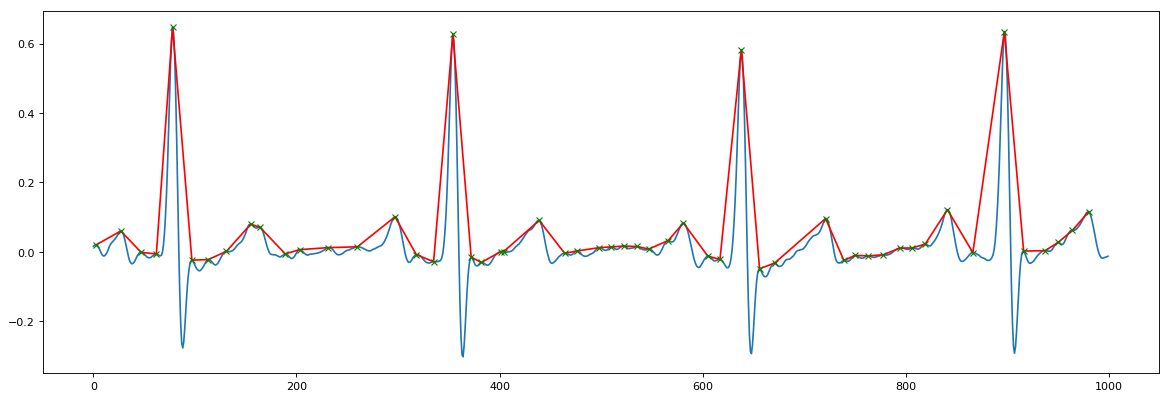

In [735]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
# axes.set_ylim([0,2])
plt.plot(dog_ex[5000:6000])
loc= dog_ex[5000:6000]
mew = find_peaks(dog_ex[5000:6000])[0]
print(mew)
print(type(mew))
plt.plot(mew, loc[mew], c='r')
plt.plot(mew, loc[mew], 'x', c='g')


# у собаки P пик = максимум из 5 пиков до R - соотвественно 2 минимума рядом - точки начала и конца пика
# тета волна пик = максимум из 10 максимумов - но 15 здесь брать много, 
# тк там уже след r пик попадает, а он может быть больше 
#  а это норм, то что тут такое падение на S волне?
# threshold  в remove artifacts = пусть будет 1, там как будто нет артифактов

[ 10  14  18  35  47  58  63  68  76  85  97 105 112 123 137 143 164 173
 188 197 208 214 227 238 245 251 262 266 281 298]
<class 'numpy.ndarray'>


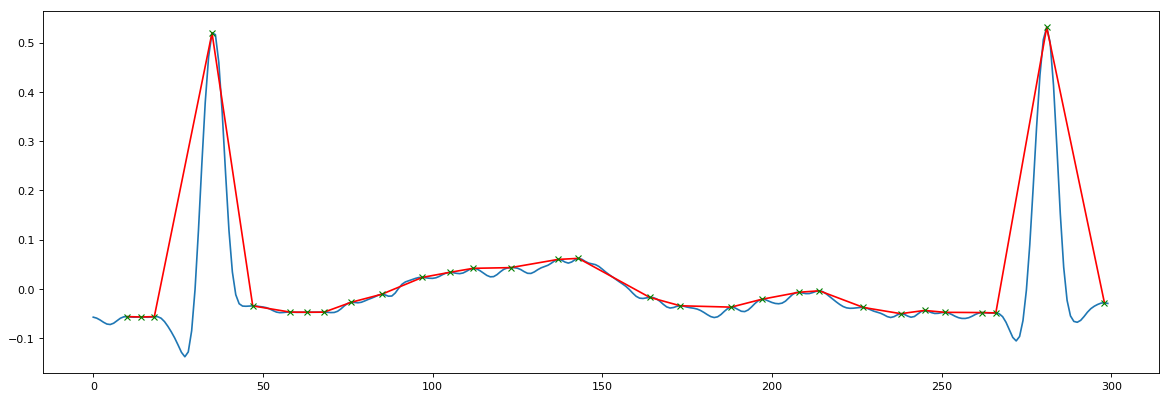

In [736]:

rabbit_ex = butterworth_filtering(lcf=lcf, hcf=hcf, fs=fs,ecg=rabbit_ex)
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
# axes.set_ylim([0,2])
start = 8200
plt.plot(rabbit_ex[start:start+300])
loc= rabbit_ex[start:start+300]
mew = find_peaks(rabbit_ex[start:start+300])[0]
print(mew)
print(type(mew))
plt.plot(mew, loc[mew], c='r')
plt.plot(mew, loc[mew], 'x', c='g')
# threshold  в remove artifacts = +0.7 и - 0.35
# пик theta волны - максимум из максимум 10 след пиков(при этом в эти 10 попадает p пик, надо быть аккуратнее, 
# по идее p пик конечно меньше, но из-за дрифта бейслайна оно может быть и выше?)
# p пик здесь - максимум из 7 пиков до R
# короче по уму надо find_peaks находить сначала максимальный пик между 2 R пиками - это theta, 
# а потом между theta и R находить пик и это будет P

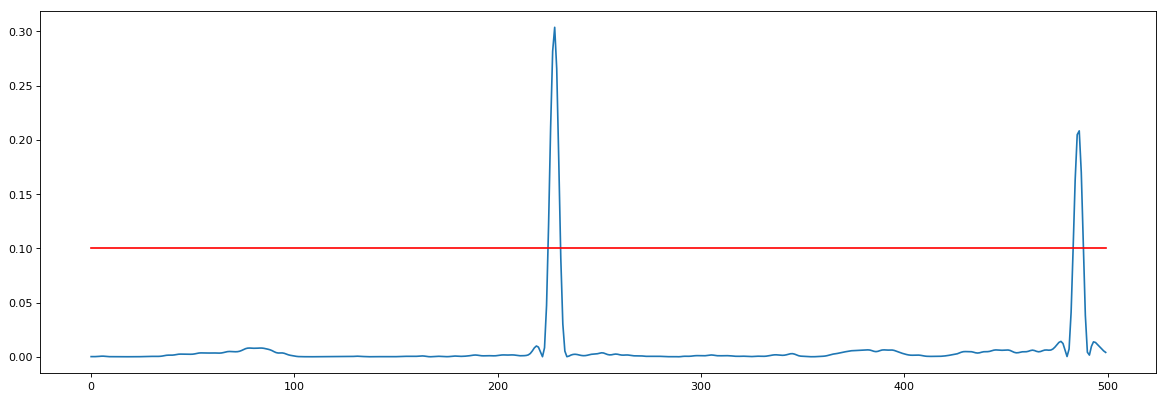

In [737]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot((rabbit_ex*rabbit_ex)[53500:54000])
gav=np.zeros((500,))+0.1
plt.plot(gav, 'r')

[  8  13  19  26  33  38  45  50  57  64  69  74  81  87  93  98 108 120
 124 132 142 147 153 159 166 171 182 197 204 211 217 227 233 241 248 255
 259 264 271 278 283 288 294 301 306 314 324 328 333 339 345 351 358 370
 377 381 388 395]
<class 'numpy.ndarray'>


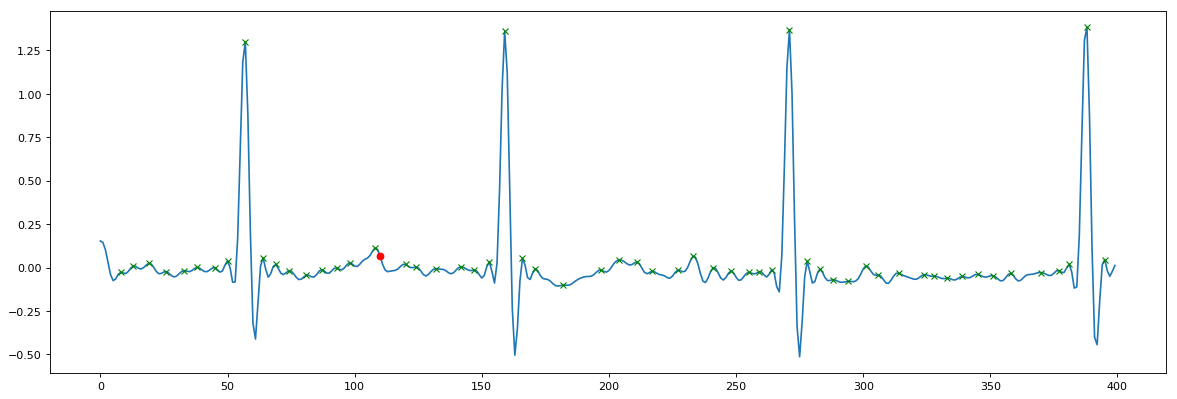

In [738]:
# mouse_ex = mouse_ex*(-1)
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
# axes.set_ylim([0,2])

plt.plot(mouse_ex[5100:5500])
loc= mouse_ex[5100:5500]
mew = find_peaks(mouse_ex[5100:5500])[0]
print(mew)
print(type(mew))
# plt.plot(mew, loc[mew], c='r')
plt.plot(mew, loc[mew], 'x', c='g')
plt.plot(110, loc[110], 'o', c='r' )


# это норм, что здесь такое падение перед QRS?
# это норм, что тета и p волны почти впритык(друг за другом)?
# threshold  в remove artifacts = 1 и -2
# здесь по сути теты волны начинается с первого пика после R
# Как здесь найти p пик?
# короче, ищем максимальный пик между R-R - это будет пик теты, потом по нему спускаемся- находим его границы,
# потом между тета и R ищем p пик?

In [739]:
path='/Users/polinaturiseva/Downloads/mammals_dataset/text_format'

In [740]:
def get_pathes(path_train):
    files = []
    for r, d, f in os.walk(path_train):
        for file in f:
            files.append(os.path.join(r, file))
    return files


# folders - названия кореневых папок с животными
# subfolders - названия подпапок для каждого животного 
def get_folders_and_subfolders():
    folders = os.listdir (path)
    subfolder=[]
    for i in folders:
        subfolder.append(os.listdir(path+'/'+i))
    return folders, subfolder
    

def upload_file (folder, subfolder_name, reverse=False):
    way = path+'/'+folder+'/'+subfolder_name+'/electrography_'+subfolder_name+'.txt'
    if reversed:
        file = np.loadtxt(way, skiprows=14)*(-1)
    else:
        file = np.loadtxt(way, skiprows=14)
    return file

In [741]:
# ' в matlab = transponing
# filtfilt- filtering both forward and back
t = np.linspace(0, 1.0, 2001)
xlow = np.sin(2 * np.pi * 5 * t)
print(xlow.shape)

def butterworth_filtering(lcf, hcf, fs, ecg):
    # removes all frequencies less 0.05 Hz
    [b_bas, a_bas] = butter(2, lcf/(fs/2), 'high')
    # removes all frequencies greater 100 Hz
    [b_lp, a_lp] = butter(5, hcf/(fs/2), 'high')
    bpfecg = ecg - filtfilt(b_lp, a_lp, ecg)
    bpfecg = filtfilt(b_bas, a_bas, bpfecg)
    return bpfecg


# breaks initial arrya into several subarrays, dropping artefacts
# but butterworth filtering is applied before in order to minimize side effects


# надо ли чистить рябь? (см картинки рябь в загрузках на локалке) - да, надо подумать как
# currently not working
def get_rid_of_artifacts(arr, lim):
    final_arr = []
    to_drop ,_ = find_peaks(arr, height=lim)
    start_point = []
    end_points = []
    for i in range(0, len(to_drop)):
        if start_point == to_drop[i]:
            continue
        final_arr.append(arr[start_point:to_drop[i]-1])
        start_point=to_drop[i]+1
    return final_arr

(2001,)


In [742]:
#interval- from start to start
#segment from end to start
#pqrst
def create_metrics():
    names=["QRS interval", 
           "S-S", 
           "Theta-Theta", 
           "R-R", 
           'Q-Q', 
           'P-P', 
           'P-R interval', 
           'P-R segment',
           'S-T interval',
           'S-T segment',
           'Q-T interval',
           'Q-T segment',
           'P interval',
           'T interval']
    metrics=pd.DataFrame(columns=names)
    return metrics

In [ ]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
axes.set_ylim([0,2])
plt.plot(abs(cA))
time = np.zeros_like(a/2)
# всё что выше 0,65 - отхождение электродов
time+=0.65 
plt.plot(time)
# plt.plot(cur_a[0:500])

In [ ]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
# axes.set_ylim([0,2])
# reconstr=pywt.waverec(cD[:-5] + [None] * 2, 'sym4')
# plt.plot(reconstr[1000:2000], c='b')
plt.plot(a[1000:2000], c='b')
krya=np.zeros((1000,))
plt.plot(krya, c='g')
# print(reconstr.shape)
# mew = find_peaks(reconstr[1000:2000])
loc= a[1000:2000]
mew = find_peaks(a[1000:2000])[0]
plt.plot(mew, loc[mew], c='r')
plt.plot(mew, loc[mew], 'x', c='g')

In [ ]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
# axes.set_ylim([0,2])
plt.plot((cA[0:500]))
plt.plot(a[0:500])

In [ ]:
R, R_pror =find_peaks(a, height=0.23)

In [ ]:
r_loc=R[0:100]
a_loc=a[0:r_loc[99]+1]
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(a_loc)
plt.plot(r_loc, a_loc[r_loc], "x")
plt.plot(np.zeros_like(a_loc), "--", color="gray")
plt.show()

In [ ]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
r_squared, r_squared_pror = find_peaks(a_squared, height=(0.05, 0.17), distance=180)
artifacts, artifacts_pror = find_peaks(a_squared, height=0.5)                                      

b_1 = r_squared[500:601]
print(len(b_1))
# print(b_1[1000])
a_1 = a_squared[b_1[0]:b_1[100]+1]
b_1=b_1-r_squared[500]
plt.plot(a_1)
plt.plot(b_1, a_1[b_1], 'x')

In [ ]:
r_squared_1 = [r_squared[i]-r_squared[i-1] for i in range(1, len(r_squared)-1)]
print(pd.DataFrame(r_squared_1).describe())
print(r_squared_1[0])

In [761]:
# https://dsp.stackexchange.com/questions/47437/discrete-wavelet-transform-visualizing-relation-between-decomposed-detail-coef
# функция для вивлетов брались из примера по ссылке выше
# попробовать вейвлет Daubechies 8

#find p should be false for mice
def find_q_s_t_p(r, arr, lev, animal, find_p=True):
    q = []
    s = []
    theta_peak = []
    theta_start = []
    theta_end = []
    p_peak = []
    p_start = []
    p_end = []
    all_peaks = find_peaks(arr)
    is_first = True
    ecg_after_wavelet = wavelets(arr)
    s_pos = 0
    for i in r:
        pos = i
        while arr[pos]>=arr[pos-1]:
            pos = pos-1
        q.append(pos)
        pos = i
#         if pos+1!=len(arr)
        while pos+1!=len(arr) and arr[pos]>=arr[pos+1]:
            pos = pos+1
        if pos+1==len(arr):
            break
        s.append(pos)
        
        if not is_first and animal!='mouse':
#             ecg_after_wavelet = wavelets(arr[prev:cur])
            # indexes from [0; cur-prev]
            cur=q[s_pos]
#             wave_mins, _ = find_peaks(ecg_after_wavelet*(-1))
            sub_ar_for_theta_peak = list(arr[prev:int(round((cur-prev)*0.6)+prev)])
            sub_ar_for_p_peak = list(arr[int(round((cur-prev)*0.6)+prev):cur])
            theta_peak.append(sub_ar_for_theta_peak.
                                       index(max(sub_ar_for_theta_peak))+prev)
            p_peak.append(int(sub_ar_for_p_peak.
                                       index(max(sub_ar_for_p_peak))+prev+round((cur-prev)*0.6)))
             
        prev = s[s_pos]
        s_pos+=1  
        is_first = False
    return q, s, theta_peak, p_peak
    
    
def wavelets(ecg, lev_to_decompose=6, lev_to_recontr=3):
    decontr = pywt.wavedec(ecg, 'sym4', 'ppd', lev_to_decompose)
    reconstr = pywt.waverec(rabbit_ex_wav[:-lev_to_recontr] + [None] * lev_to_recontr, 'sym4')
    return reconstr


# умножение на маску 1, -1, чтобы ложно не определялись нижние пики
def find_r(ecg, animal):
    ecg_ar = np.array(ecg)
    ecg=list(ecg)
    sign = np.where(ecg_ar>0, 1, -1)
    ecg_sq = [item*item for item in ecg]
    ecg_sq= ecg_sq*sign
    
#     peaks, _ = find_peaks(ecg_sq, distance=80)
    if animal == 'mouse':
        peaks, _ = find_peaks(ecg_sq, distance=80)
    else:
        peaks, _ = find_peaks(ecg_sq, distance=100, height=0.02)
        
    amp=[ecg[int(i)] for i in peaks]
    if len(amp)==0:
        return None, None, None, None
    av = mean(amp)
    if len(amp)>1:
        var = variance(amp)
    else:
        var = amp[0]
    if av<0:
        ecg = [i * (-1) for i in ecg]
        return find_r(ecg, animal)
    else :
        return peaks, av, var, np.array(ecg) 
    
#     return find_peaks(ecg, distance=100)
  
    
#выкидывает ещё 2 секунды до и после артефакта
def filt_electrodes(ecg, av, var):
    indexes_to_drop = np.where(abs(ecg)>abs(av)+abs(var))[0] 
    start_drop = []
    end_drop = []
    pos = 0
    while pos < (len(indexes_to_drop)-1):
#         print(pos)
        if indexes_to_drop[pos] - 2*fs<0:
            start_drop.append(0)
        else:
            start_drop.append(indexes_to_drop[pos] - 2*fs)
        
        while (len(indexes_to_drop)-1)>pos and indexes_to_drop[pos+1] - indexes_to_drop[pos] <100:
            pos+=1
        if indexes_to_drop[pos]+2*fs >= len(ecg):    
            end_drop.append(len(ecg))
            break
        else:
            end_drop.append(indexes_to_drop[pos]+2*fs)
        pos+=1
        
    ecg_filtered = []
    for i in range(len(end_drop)-1):
        if i==0:
            if start_drop[0]<100:
                continue
            else:
                ecg_filtered.append(ecg[0:start_drop[0]])
        else:
            ecg_filtered.append(ecg[end_drop[i-1]:start_drop[i]])
            
    if len(end_drop)>0:
        if end_drop[-1]==len(ecg) or len(ecg)-end_drop[-1]<100:
            pass
        else:
            ecg_filtered.append(ecg[end_drop[-1]:len(ecg)])
        
    return ecg_filtered, len(end_drop), start_drop, end_drop
    
        
def step_by_step(folder, subfolder_name, animal, lim = 1, level = 6, qrs_approx=30):
    file = upload_file (folder=folder, subfolder_name=subfolder_name)
    file = butterworth_filtering (lcf=lcf, hcf=hcf, fs=fs, ecg=file)
#     arr = get_rid_of_artifacts(file, lim)
    arr =file
    preprocessed_arr = []
    r_peaks = []
    q_peaks =[]
    s_peaks =[]
    theta_peaks =[]
    p_peaks =[]
    r_p, r_av, r_var, arr = find_r(arr, animal=animal)
    arr, drops, start_drops, end_drops = filt_electrodes(arr, r_av, r_var)
    for i in range(len(arr)):
        if len(arr[i])==0:
            continue
#         preprocessed_arr = preprocessed_arr.append(pywt.wavedec(arr, 'sym4', 'ppd', level))
#         print(preprocessed_arr)
        r_, av_h, std, _ = find_r(arr[i], animal=animal)
        if r_ is None:
            continue
        r_peaks.append(r_)
        q_, s_, theta_, p_ = find_q_s_t_p(r_, arr[i], animal=animal, lev = level)
        q_peaks.append(q_)
        s_peaks.append(s_)
        theta_peaks.append(theta_)
        p_peaks.append(p_)
#     print(r_peaks)    
    return q_peaks, s_peaks, theta_peaks, p_peaks, r_peaks, drops, start_drops, end_drops


def shifted_points(points, loc, start, shift):
    points_ = np.array(points)
    loc_points = np.array(np.where((points_<start+shift) & (points_>start)))
    x = (points_[loc_points] - start).reshape(-1) 
    y = loc[points_[loc_points] - start].reshape(-1)
    return x, y


def draw_graph(filtered_ecg, q_ar=[], s_ar=[], r_ar=[], p_ar=[], t_ar=[], 
               p=True, theta=True, q=True, r=True, s=True,
               save=False, name=None, start=0, shift=2500):

    plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(np.zeros(shift,))
    
    plt.plot(filtered_ecg[start:start+shift])
    loc = filtered_ecg[start:start+shift]
    
#     loc_r = np.array(np.where((r_ar<start+shift) & (r_ar>start)))
#     loc_r = r_ar[loc_r] 
#     loc_r = loc_r.reshape(-1)
#     plt.plot(loc_r-start, loc[loc_r-start], 'o', 'r')
    
    x, y = shifted_points(q_ar, loc, start, shift)
    plt.plot(x, y, 'o', 'b')
    
    x, y = shifted_points(r_ar, loc, start, shift)
    plt.plot(x, y, 'o', 'r')
    
    x, y = shifted_points(s_ar, loc, start, shift)
    plt.plot(x, y, 'o', 'r')
    
    x, y = shifted_points(p_ar, loc, start, shift)
    plt.plot(x, y, 'o', 'r')
    
    x, y = shifted_points(t_ar, loc, start, shift)
    plt.plot(x, y, 'o', 'r')
    
    if save:
        pass
    

In [760]:
q_peaks, s_peaks, theta_peaks, p_peaks, r_peaks,drops,start_drops,end_drops = step_by_step(folder='dog_17', subfolder_name='Dog_04', animal='mouse')

In [684]:
ue=ue*(-1)
print(ue)

[ 0.04669216  0.04707809  0.05406726 ... -0.00233864  0.00606817
  0.0088164 ]


In [585]:
def remove_shift(peaks, start_from, shift):
    loc_s = np.array(np.where((peaks<start_from+shift) & (peaks>start)))
    a11 = (s_peak[loc_s] - start).reshape(-1) 
    a22 = loc[s_peak[loc_s] - start].reshape(-1)

[[], [], [], [], [], []]

In [745]:
# sample animals - dog
ue = upload_file (folder='dog_17', subfolder_name='Dog_04')
ue = butterworth_filtering (lcf=lcf, hcf=hcf, fs=fs, ecg=ue)

In [630]:
# sample animals - mouse
ue = upload_file (folder='mouse_8', subfolder_name='Mouse_04')
ue = butterworth_filtering (lcf=lcf, hcf=hcf, fs=fs, ecg=ue)

In [1]:
# sample animals - rabbit
ue = upload_file (folder='rabbit_20', subfolder_name='Rabbit_02_part_1')
ue = butterworth_filtering (lcf=lcf, hcf=hcf, fs=fs, ecg=ue)

NameError: name 'upload_file' is not defined

(12,)
[[ 0  1  2  3  4  5  6  7  8  9 10 11]]


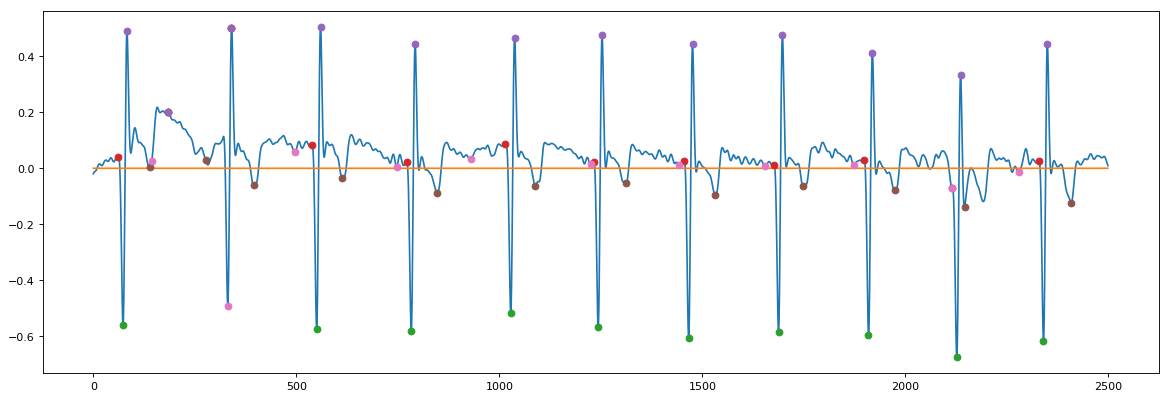

In [747]:
start = 0
shift = 2500
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ue[start:start+shift])
loc = ue[start:start+shift]

loc_r = np.array(np.where((r_peaks[0]<start+shift) & (r_peaks[0]>start)))
loc_r = r_peaks[0][loc_r] 
loc_r = loc_r.reshape(-1)
plt.plot(loc_r-start, loc[loc_r-start], 'o')

q_peak=np.array(q_peaks[0])
loc_q = np.array(np.where((q_peak<start+shift) & (q_peak>start)))
a1 = (q_peak[loc_q] - start).reshape(-1) 
a2 = loc[q_peak[loc_q] - start].reshape(-1)
plt.plot(a1, a2, 'o')

s_peak=np.array(s_peaks[0])
loc_s = np.array(np.where((s_peak<start+shift) & (s_peak>start)))
a11 = (s_peak[loc_s] - start).reshape(-1) 
a22 = loc[s_peak[loc_s] - start].reshape(-1)
plt.plot(a11, a22, 'o')

t_peak=np.array(theta_peaks[0])
loc_t = np.array(np.where((t_peak<start+shift) & (t_peak>start)))
a111 = (t_peak[loc_t] - start).reshape(-1) 
a222 = loc[t_peak[loc_t] - start].reshape(-1)
plt.plot(a111, a222, 'o')

p_peak=np.array(p_peaks[0])
loc_p = np.array(np.where((p_peak<start+shift) & (p_peak>start)))
a1111 = (p_peak[loc_p] - start).reshape(-1) 
a2222 = loc[p_peak[loc_p] - start].reshape(-1)
plt.plot(a1111, a2222, 'o')

In [639]:
ee, _ =find_peaks(ue, distance=80)

In [697]:
ue=ue*(-1)

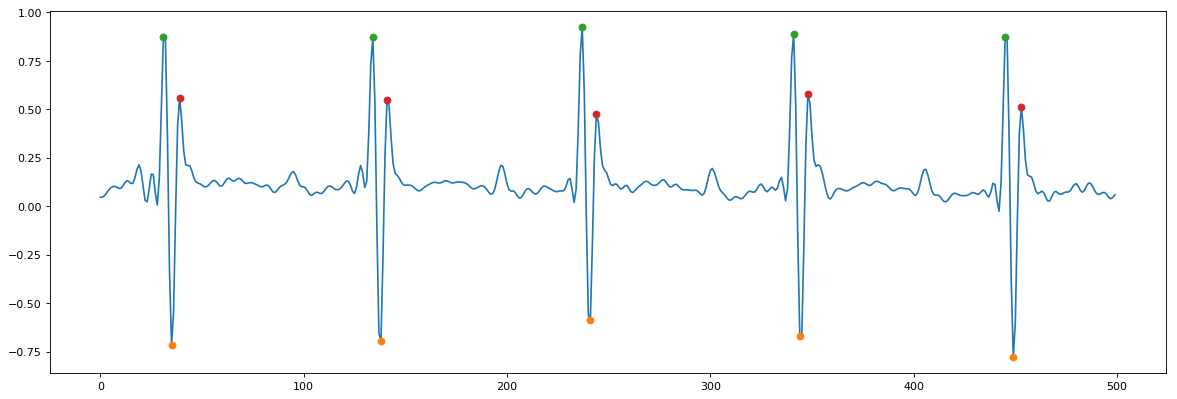

In [712]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ue[start:start+shift])
loc_s = np.array(np.where((ee<500) & (ee>0)))
a11 = (ee[loc_s] - 0).reshape(-1) 
a22 = loc[ee[loc_s] - 0].reshape(-1)
plt.plot(a11, a22, 'o')
q,s,t,p = find_q_s_t_p(ee, ue*(-1), lev=6, animal='mouse')

q=np.array(q)
loc_q = np.array(np.where((q<start+shift) & (q>start)))
a1 = (q[loc_q] - start).reshape(-1) 
a2 = loc[q[loc_q] - start].reshape(-1)

# plt.plot(loc_qs, loc[loc_qs], 'o')
plt.plot(a1, a2, 'o')

# s_peak=np.array(s_peaks[0])
s=np.array(s)
loc_s = np.array(np.where((s<start+shift) & (s>start)))
a11 = (s[loc_s] - start).reshape(-1) 
a22 = loc[s[loc_s] - start].reshape(-1)
plt.plot(a11, a22, 'o')

In [323]:
uue=upload_file (folder='rabbit_20', subfolder_name='Rabbit_02_part_1')
uuee = butterworth_filtering (lcf=lcf, hcf=hcf, fs=fs, ecg=uue)
#     arr = get_rid_of_artifacts(file, lim)
arr =uuee
r_peaks, r_av, r_var = find_r(arr)
arr, drops, start_drops, end_drops = filt_electrodes(uuee, r_av, r_var)

In [ ]:
# r_peaks=r_peaks[0]
tr=[]
for i in range(len(r_peaks)-1):
    tr.append(r_peaks[i+1]-r_peaks[i])
#     print(r_peaks[i+1]-r_peaks[i])
print(tr)

In [ ]:
r_samples = pd.DataFrame(tr)

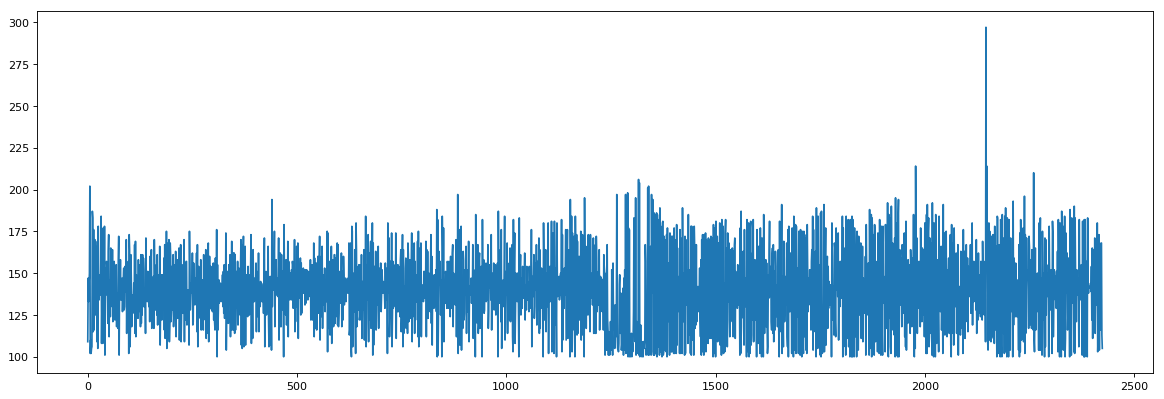

In [277]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
plt.plot(r_samples)

In [327]:
print(start_drops)
print(end_drops)

[172599, 175750, 176476, 225622, 243586, 274573, 298690, 311579]
[177606, 177798, 178951, 227743, 245729, 276921, 303209, 313780]


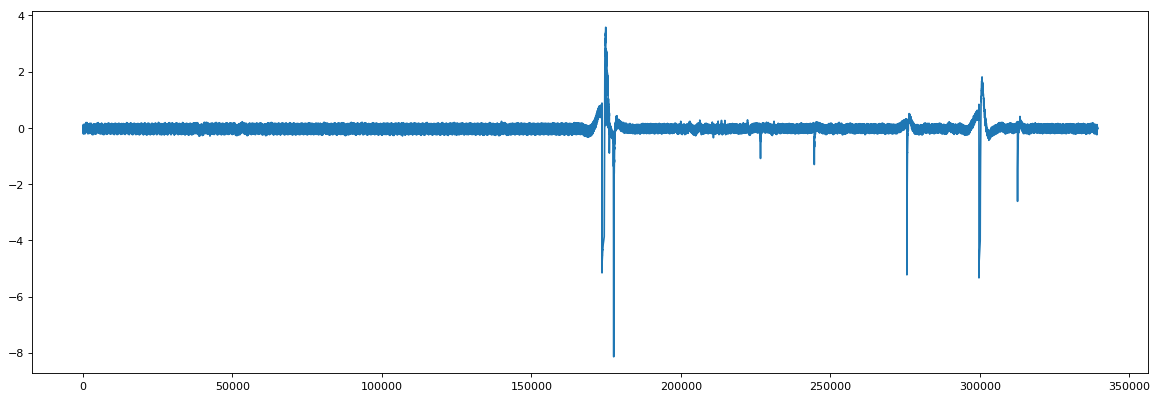

In [340]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
plt.plot(ue)
# plt.plot(np.zeros((10000,)))

In [331]:
len(arr)

8

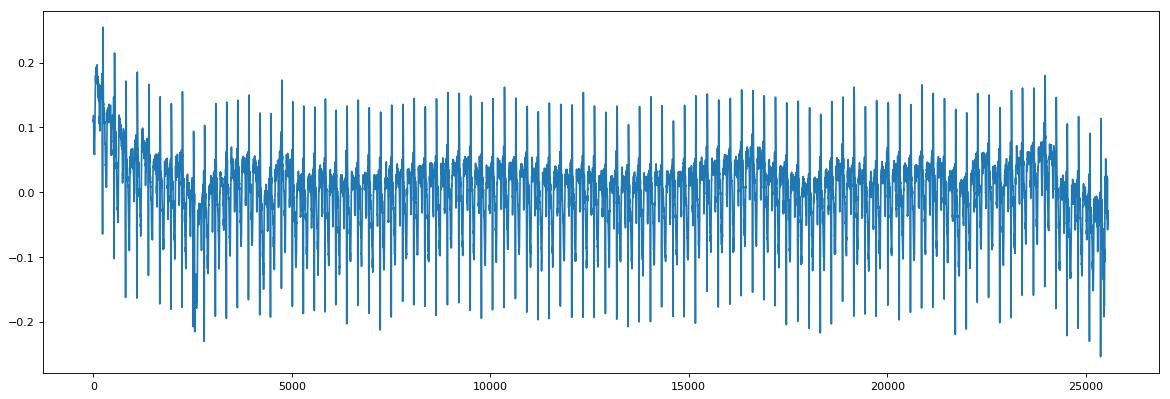

In [348]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
plt.plot(arr[7])